In [123]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

**Вариант 9**

**Задание №1(5.1.9)**

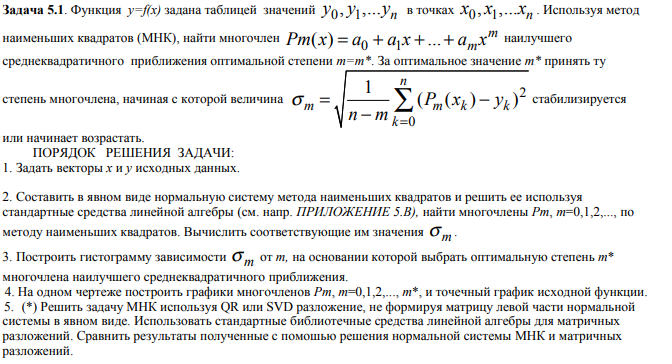

In [124]:
Image('5.1.9.png')

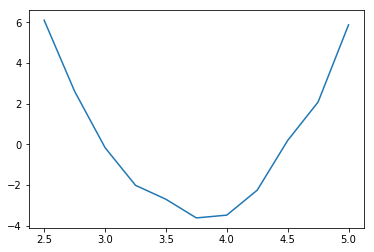

In [4]:
x = np.arange(2.5, 5.25, 0.25)
y = [6.109, 2.615, -0.157, -2.01, -2.697, -3.615, -3.478, -2.250, 0.193, 2.086, 5.882]
y = np.array(y)
plt.plot(x,y)

**Составляем нормальную систему**

In [5]:
def norm_sys_polyn(m, x ,y):
    A = np.zeros([m,m])
    b = []
    s,c = 0,0
    for k in range(0,m):
        for j in range(0,m):
            for i in range(0, len(x)):
                s += ((x[i])**j) * ((x[i])**k)
            A[k,j] = s
            s = 0
            
    for k in range(0,m):
        for i in range(0,len(x)):
            c += (x[i])**k * y[i]
        b.append(c)
        c = 0
    b = np.array(b)
    a = np.linalg.solve(A,b)
    return(a)

def P(a,t):
    p = 0
    for i in range(0,len(a)):
        p += a[i]*t**(i)
    return p
    

**Проверка**

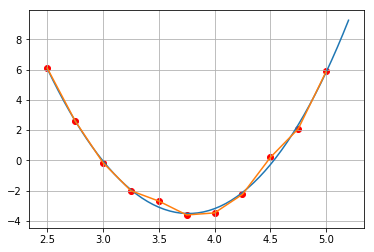

In [6]:
a = norm_sys_polyn(5, x, y)
t = np.arange(2.5, 5.25, 0.05)
p = [P(a,y) for y in t]

plt.plot(t,p)
plt.plot(x,y)
plt.scatter(x, y, c = 'r')
plt.grid()

**Ищем оптимальную степень многочлена**

In [7]:
def sigma(m, x, y):
    s = 0
    a = norm_sys_polyn(m, x, y)
    for i in range(0, len(x)):
        s += (P(a, x[i]) - y[i])**2
    return((s/(len(x) - m))**(1/2))

Text(0,0.5,'sigma')

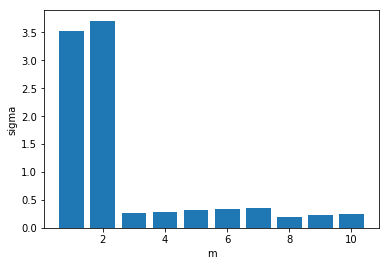

In [8]:
M = np.arange(1, 11)
sig = [sigma(k,x,y) for k in M]
plt.bar(M,sig)
plt.xlabel('m')
plt.ylabel('sigma')

**Оптимальное m = 8**

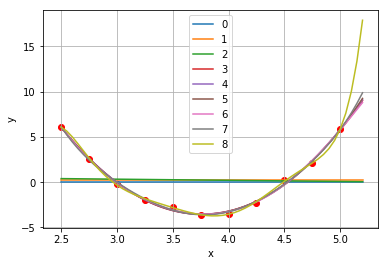

In [9]:
l = []
for i in range(0,9):
    a = norm_sys_polyn(i, x, y)
    t = np.arange(2.5, 5.25, 0.05)
    p = [P(a,y) for y in t]
    plt.plot(t,p)
    l.append(str(i))
plt.scatter(x, y, c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(l)
plt.grid()
    


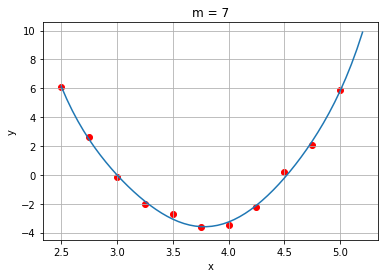

In [52]:
a = norm_sys_polyn(7, x, y)
t = np.arange(2.5, 5.25, 0.05)
p = [P(a,y) for y in t]
plt.plot(t,p)
plt.scatter(x, y, c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('m = 7')
plt.grid()
    

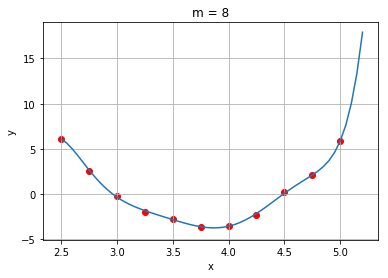

In [53]:
a = norm_sys_polyn(8, x, y)
t = np.arange(2.5, 5.25, 0.05)
p = [P(a,y) for y in t]
plt.plot(t,p)
plt.scatter(x, y, c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('m = 8')
plt.grid()
    

**Видно, что при m = 8 наша аппроксимация уже описывает особенности**

**Задание №2(5.5.5)**

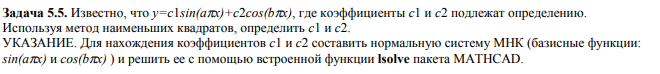

In [125]:
Image('5.5.5.png')

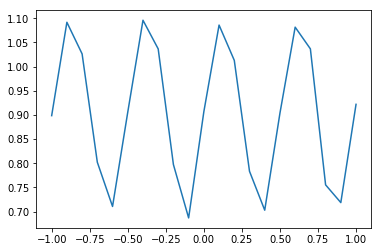

In [10]:
x_1 = np.arange(-1,1.1, 0.1) 
y_1 = [0.8984, 1.0916, 1.0262, 0.802, 0.7105, 0.9056, 1.0958, 1.0365, 0.7972, 0.6868, 0.9066, 1.0858, 1.0128, 0.7833, 0.7028, 0.9035, 1.0815, 1.0366, 0.7552, 0.7185, 0.9218 ]
y_1 = np.array(y_1)
plt.plot(x_1, y_1)

In [11]:
def norm_sys_trigon(m, x ,y):
    A = np.zeros([m,m])
    b = []
    s,c = 0,0
    for k in range(0,m):
        for j in range(0,m):
            for i in range(0, len(x)):
                s += ((np.sin(4*np.pi*x[i]))**j) * ((np.sin(4*np.pi*x[i]))**k)
            A[k,j] = s
            s = 0
            
    for k in range(0,m):
        for i in range(0,len(x)):
            c += (np.sin(4*np.pi*x[i]))**k * y[i]
        b.append(c)
        c = 0
    b = np.array(b)
    a = np.linalg.solve(A,b)
    return(a)

def trig_pol(a,t):
    return(a[0] + a[1]*np.sin(4*np.pi*t))

**Полученное таким образом приближение:**

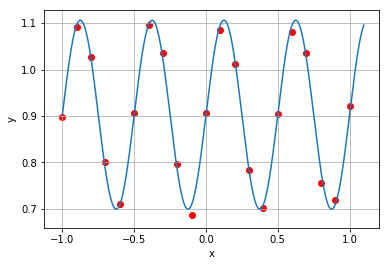

In [12]:
a_1 = norm_sys_trigon(2, x_1, y_1)
t_1 = np.arange(-1,1.1, 0.001) 
p_1 = [trig_pol(a_1,y) for y in t_1]

plt.plot(t_1,p_1)
plt.scatter(x_1,y_1, c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

**Задание №3(5.6.9) Выбрал такое задание, поскольку в моем варианте на третьей позиции повторяется прошлый номер.**

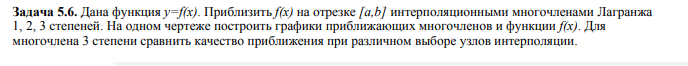

In [126]:
Image('5.6.9.png')

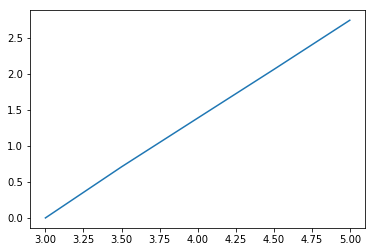

In [42]:
x_2 = np.arange(3, 5.5, 0.5)
t_2 = np.arange(3, 5.1, 0.1)
y_2 = [t*np.log((t - 2)**(1/2)) for t in x_2]
plt.plot(x_2, y_2)

In [43]:
def lagrange_interp(m, x, y, t):
    l = 1
    L = 0
    for i in range(0,len(x)):
        for k in range(0, len(x)):
            if k != i:
                l*= (t - x[k])/(x[i] - x[k])
        L += y[i]*l
        l = 1
    return(L)
                
    

**Cтроим многочлены Лагранжа 1-ой, 2-ой и 3-ей степени.**

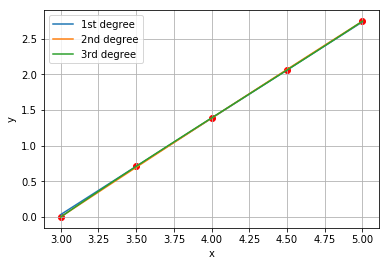

In [44]:
x_deg_1 = [3.5, 4.5]
y_deg_1 = [t*np.log((t - 2)**(1/2)) for t in x_deg_1]
x_deg_2 = [3, 4, 5]
y_deg_2 = [t*np.log((t - 2)**(1/2)) for t in x_deg_2]
x_deg_3 = [3, 3.5, 4.5 ,5]
y_deg_3 = [t*np.log((t - 2)**(1/2)) for t in x_deg_3]
l_1 = [lagrange_interp(len(x_deg_1), x_deg_1, y_deg_1, s) for s in t_2]
l_2 = [lagrange_interp(len(x_deg_2), x_deg_2, y_deg_2, s) for s in t_2]
l_3 = [lagrange_interp(len(x_deg_3), x_deg_3, y_deg_3, s) for s in t_2]
leg = ['1st degree', '2nd degree', '3rd degree']
plt.scatter(x_2, y_2, c ='r')
plt.plot(t_2, l_1)
plt.plot(t_2, l_2)
plt.plot(t_2, l_3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg)
plt.grid()

**Теперь рассмотрим отличие многочленов Лагранжа 3-ей степени при выборе разных узлов интерполирования**

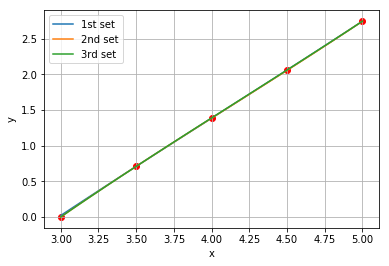

In [46]:
t_2 = np.arange(3, 5.1, 0.1)
x_3_1 = [3.5, 4, 4.5, 5]
y_3_1 = [t*np.log((t - 2)**(1/2)) for t in x_3_1]
x_3_2 = [3, 3.5, 4, 5]
y_3_2 = [t*np.log((t - 2)**(1/2)) for t in x_3_2]
x_3_3= [3, 3.5, 4.5 ,5]
y_3_3 = [t*np.log((t - 2)**(1/2)) for t in x_3_3]
l_1_1 = [lagrange_interp(len(x_3_1), x_3_1, y_3_1, s) for s in t_2]
l_2_1 = [lagrange_interp(len(x_3_2), x_3_2, y_3_2, s) for s in t_2]
l_3_1 = [lagrange_interp(len(x_3_3), x_3_3, y_3_3, s) for s in t_2]
leg = ['1st set', '2nd set', '3rd set']
plt.scatter(x_2, y_2, c ='r')
plt.plot(t_2, l_1_1)
plt.plot(t_2, l_2_1)
plt.plot(t_2, l_3_1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg)
plt.grid()

**Для данной функции отличия нет **

**Задание 4(5.8.5)**

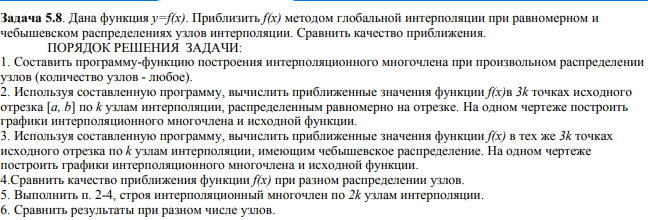

In [127]:
Image('5.8.png')

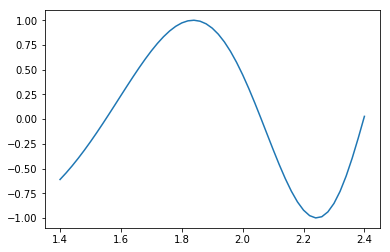

In [87]:
a = 1.4
b = 2.4
k = 30
x_3 = np.arange(a, b + 0.01, 0.01)
def f(x):
    return(np.cos(np.exp(x)))
plt.plot(x_3, f(x_3))

**Интерполируем с равномерным распределнием узлов**

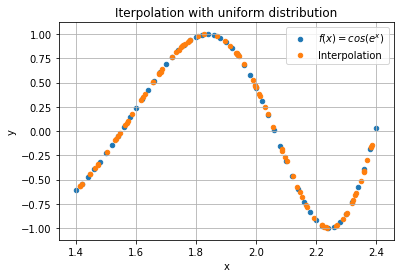

In [108]:
x_ravn = np.sort(np.random.uniform(a,b,k))
x_ravn1 = np.sort(np.random.uniform(a,b,3*k))
l_ravn = [lagrange_interp(len(x_ravn), x_ravn, f(x_ravn), s) for s in x_ravn1]
leg1 = ['$f(x) = cos(e^x)$', 'Interpolation']
plt.scatter(x_3, f(x_3), s = 20)
plt.scatter(x_ravn1, l_ravn, s = 20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg1)
plt.title('Iterpolation with uniform distribution')
plt.grid()

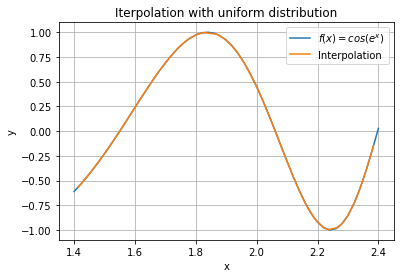

In [111]:
plt.plot(x_3, f(x_3))
plt.plot(x_ravn1, l_ravn)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg1)
plt.title('Iterpolation with uniform distribution')
plt.grid()

In [114]:
print('Ошибка', max(np.abs(l_ravn - f(x_ravn1))))
print('Cуммарная ошибка', np.sum(np.abs(l_ravn - f(x_ravn1))))

Ошибка 0.0006278506162999964
Cуммарная ошибка 0.0011826340001422908


**Интерполриуем с чебышевским распределением узлов**

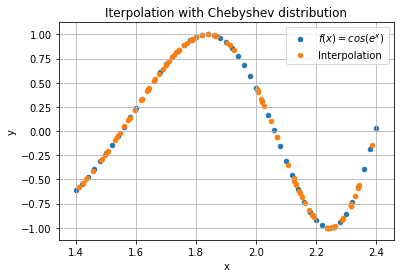

In [107]:
x_cheb = [(a+b)/2 + (b-a)/2 * np.cos((np.pi * (2*j + 1))/(2*k + 2)) for j in range(0,k)]

l_cheb = [lagrange_interp(len(x_cheb), x_cheb, f(x_cheb), s) for s in x_ravn1]
leg1 = ['$f(x) = cos(e^x)$', 'Interpolation']
plt.scatter(x_3, f(x_3), s = 20)
plt.scatter(x_ravn1, l_cheb, s = 20)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg1)
plt.title('Iterpolation with Chebyshev distribution')
plt.grid()

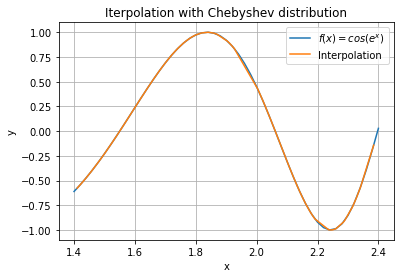

In [106]:
plt.plot(x_3, f(x_3))
plt.plot(x_ravn1, l_cheb)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg1)
plt.title('Iterpolation with Chebyshev distribution')
plt.grid()

In [115]:
print('Ошибка', max(np.abs(l_cheb - f(x_ravn1))))
print('Cуммарная ошибка', np.sum(np.abs(l_cheb - f(x_ravn1))))

Ошибка 0.4176183393926705
Cуммарная ошибка 11.399941068605731


**Видно, что интерполяция с чебышевским распределением узлов несколько хуже.**

**Проделаем то же самое, вычисляя значения в 2k точках отрезка.**

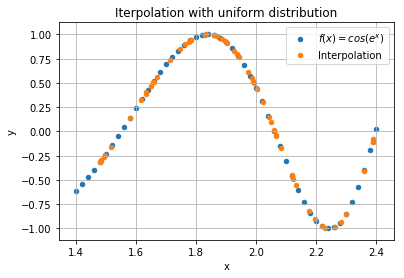

In [116]:
x_ravn = np.sort(np.random.uniform(a,b,k))
x_ravn1 = np.sort(np.random.uniform(a,b,2*k))
l_ravn = [lagrange_interp(len(x_ravn), x_ravn, f(x_ravn), s) for s in x_ravn1]
leg1 = ['$f(x) = cos(e^x)$', 'Interpolation']
plt.scatter(x_3, f(x_3), s = 20)
plt.scatter(x_ravn1, l_ravn, s = 20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg1)
plt.title('Iterpolation with uniform distribution')
plt.grid()

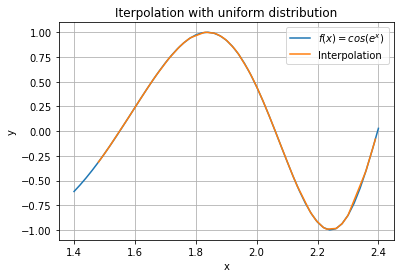

In [117]:
plt.plot(x_3, f(x_3))
plt.plot(x_ravn1, l_ravn)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg1)
plt.title('Iterpolation with uniform distribution')
plt.grid()

In [120]:
print('Ошибка', max(np.abs(l_ravn - f(x_ravn1))))
print('Cуммарная ошибка', np.sum(np.abs(l_ravn - f(x_ravn1))))

Ошибка 3.529721005757214e-08
Cуммарная ошибка 7.679650908254398e-08


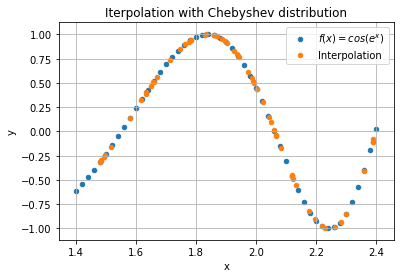

In [118]:
x_cheb = [(a+b)/2 + (b-a)/2 * np.cos((np.pi * (2*j + 1))/(2*k + 2)) for j in range(0,k)]

l_cheb = [lagrange_interp(len(x_cheb), x_cheb, f(x_cheb), s) for s in x_ravn1]
leg1 = ['$f(x) = cos(e^x)$', 'Interpolation']
plt.scatter(x_3, f(x_3), s = 20)
plt.scatter(x_ravn1, l_cheb, s = 20)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg1)
plt.title('Iterpolation with Chebyshev distribution')
plt.grid()

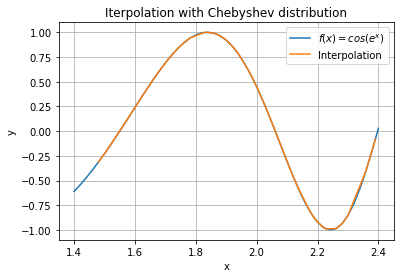

In [119]:
plt.plot(x_3, f(x_3))
plt.plot(x_ravn1, l_cheb)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(leg1)
plt.title('Iterpolation with Chebyshev distribution')
plt.grid()

In [121]:
print('Ошибка', max(np.abs(l_cheb - f(x_ravn1))))
print('Cуммарная ошибка', np.sum(np.abs(l_cheb - f(x_ravn1))))

Ошибка 1.0547118733938987e-15
Cуммарная ошибка 1.7975204658071675e-14


**При меньшем количестве узлов интерполяция с чебышевским распредлением узлов напротив работает лучше**